In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from collections import Counter

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download("popular")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

pd.set_option('display.max_columns', None)

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/A3_IA/spam.csv", encoding='ISO-8859-1')
df_teste = pd.read_csv("/content/drive/MyDrive/Datasets/A3_IA/email_classification.csv")

In [4]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df_teste.describe()

,email,label
count,179,179
unique,150,2
top,You've been selected for a free trial of our p...,ham
freq,4,100


In [7]:
df.dtypes

,0
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


In [8]:
for column in df.columns:
  print(f'{column}: {df[column].isnull().sum()}')

v1: 0
v2: 0
Unnamed: 2: 5522
Unnamed: 3: 5560
Unnamed: 4: 5566


In [9]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
df = df[['v1', 'v2']]
df.columns = ['categoria', 'email']

In [11]:
print("Distribuição de classes:", Counter(df['categoria']))

Distribuição de classes: Counter({'ham': 4825, 'spam': 747})


In [12]:
print("Distribuição de classes:", Counter(df_teste['label']))

Distribuição de classes: Counter({'ham': 100, 'spam': 79})


<ipython-input-104-2a2243a01a63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comprimento'] = df['email'].apply(len)


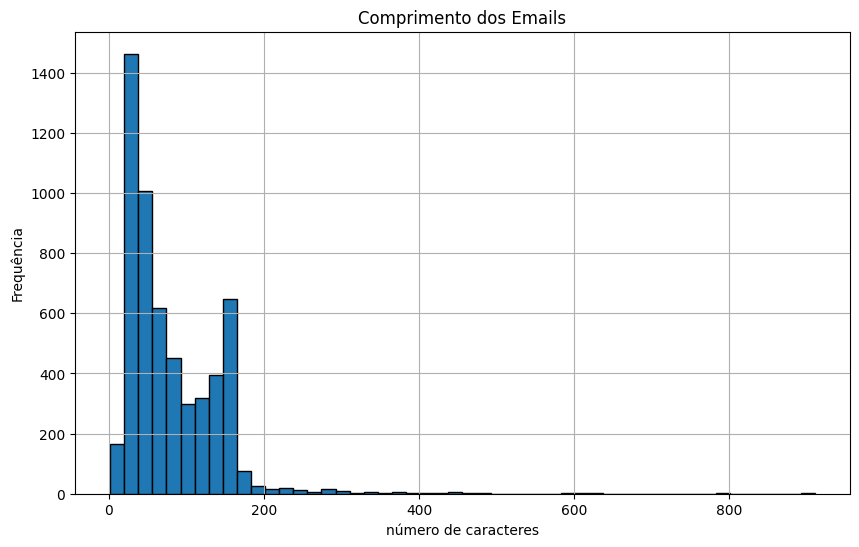

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['comprimento'] = df['email'].apply(len)

# Criação de um grafico para visualizar quantas letras tem por email
plt.figure(figsize=(10, 6))
plt.hist(df['comprimento'], bins=50, edgecolor='k')
plt.title('Comprimento dos Emails')
plt.xlabel('número de caracteres')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

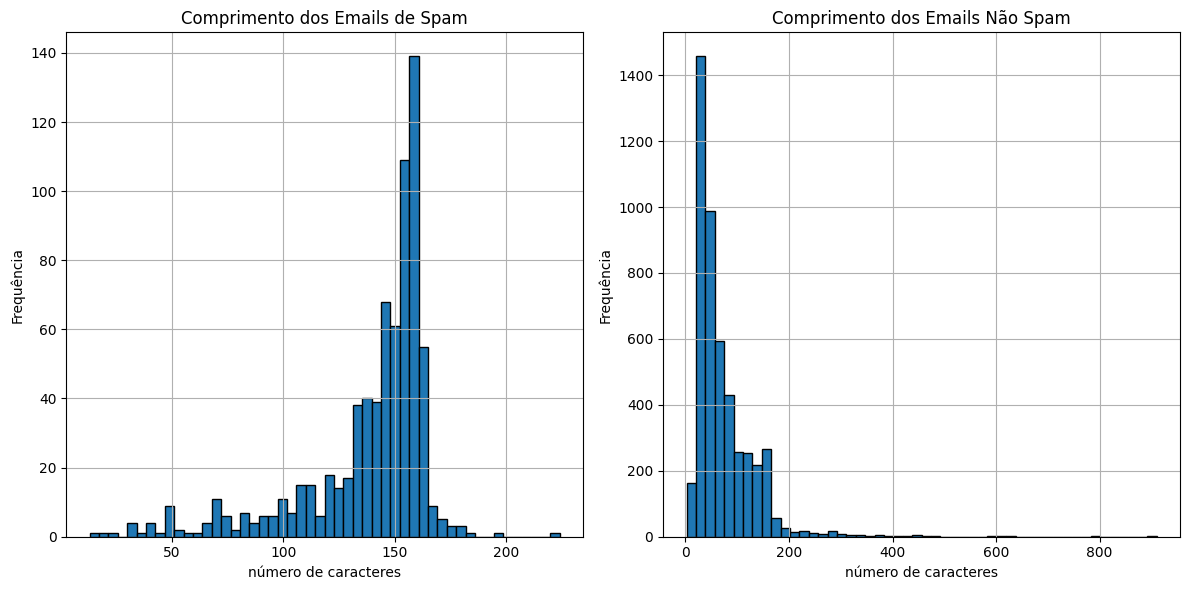

In [ ]:
spam_emails = df[df['categoria'] == 'spam']['comprimento']
nao_spam_emails = df[df['categoria'] == 'ham']['comprimento']

plt.figure(figsize=(12, 6))

# Criação de 2 gráficos para comparar a quantidade de palavras em emails spam e em emails ham
plt.subplot(1, 2, 1)
plt.hist(spam_emails, bins=50, edgecolor='k')
plt.title('Comprimento dos Emails de Spam')
plt.xlabel('número de caracteres')
plt.ylabel('Frequência')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(nao_spam_emails, bins=50, edgecolor='k')
plt.title('Comprimento dos Emails Não Spam')
plt.xlabel('número de caracteres')
plt.ylabel('Frequência')
plt.grid(True)

plt.tight_layout()
plt.show()


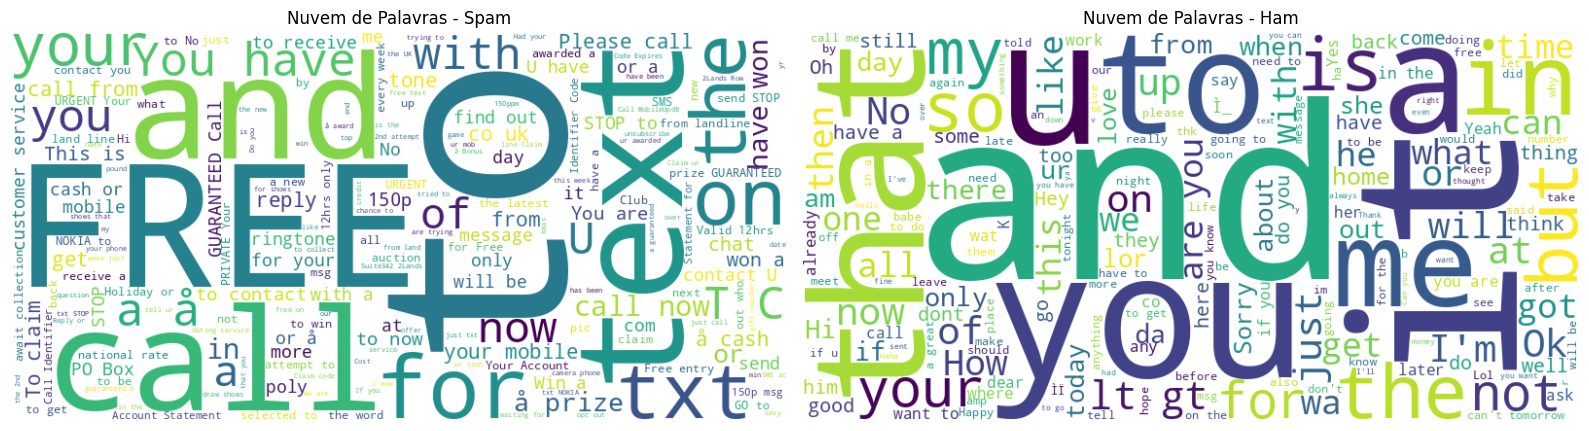

In [ ]:
from wordcloud import WordCloud

spam_emails = df[df['categoria'] == 'spam']['email']
ham_emails = df[df['categoria'] == 'ham']['email']

spam_text = ' '.join(spam_emails)
ham_text = ' '.join(ham_emails)


spam_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(spam_text)


ham_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(ham_text)


plt.figure(figsize=(16, 8))

# Criação de dois graficos nuvem de palavras  para visualizar quais são as palavras mais frequentes em cada email
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras - Spam')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras - Ham')
plt.axis('off')

plt.tight_layout()
plt.show()


# Pré processamento dos dados

In [13]:
# Transformando tudo em minusculo e removendo caracteres especiais
df['email'] = df['email'].str.lower()
df['email_sem_especiais'] = df['email'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Separando o email em token(palavras)
df['email_tokenizado'] = df['email_sem_especiais'].apply(word_tokenize)

# Remoção de stopwords do email(palavras que não tanto impacto no significado geral do texto, como o dataset é em ingles as stopwords seriam 'the', 'is', 'and')
stop_words = set(stopwords.words('english'))
df['email_sem_stopwords'] = df['email_tokenizado'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

# Aplicando a Lemmatização, que seria a redução das palavras a sua forma base. Ex: running -> run.
lemmatizer = WordNetLemmatizer()

df['email_lemmatizado'] = df['email_sem_stopwords'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)

# Reconstruindo o email já processado.
df['email_final'] = df['email_lemmatizado'].apply(lambda tokens: ' '.join(tokens))

# Transforma o texto em uma matriz númerica para ser utilizada no modelo
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['email_final'])

print("Matriz TF-IDF:")
print(X.toarray())

print("Vocabulário:")
print(vectorizer.get_feature_names_out())

Matriz TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vocabulário:
['008704050406' '0089my' '0121' ... 'ûï' 'ûïharry' 'ûò']


In [ ]:
df.head()

,categoria,email,comprimento,email_sem_especiais,email_tokenizado,email_sem_stopwords,email_lemmatizado,email_final
0,ham,"go until jurong point, crazy.. available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,ok lar... joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor... u c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"nah i don't think he goes to usf, he lives aro...",61,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though


# Separação entre treino e teste e treinamento do modelo inicial

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, df['categoria'], test_size=0.2, random_state=42)

In [15]:
# Treinamento com o modelo KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

print("Acurácia:", accuracy_score(y_test, knn_y_pred))
print("Relatório de classificação:\n", classification_report(y_test, knn_y_pred))
print("Matriz de confusão: \n", confusion_matrix(y_test, knn_y_pred))

Acurácia: 0.905829596412556
Relatório de classificação:
               precision    recall  f1-score   support

         ham       0.90      1.00      0.95       965
        spam       1.00      0.30      0.46       150

    accuracy                           0.91      1115
   macro avg       0.95      0.65      0.70      1115
weighted avg       0.92      0.91      0.88      1115

Matriz de confusão: 
 [[965   0]
 [105  45]]


# Testando outros modelos(KNN, MultinomialNB, RandomForest, SVC)


In [16]:
# Treinamento com o modelo MultinomialNB
from sklearn.naive_bayes import MultinomialNB

modelo = MultinomialNB()
modelo.fit(X_train, y_train)


y_pred = modelo.predict(X_test)


print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.9614349775784753
Relatório de classificação:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.71      0.83       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

[[965   0]
 [ 43 107]]


In [17]:
# Treinamento com o modelo SVC
from sklearn.svm import SVC

svc = SVC(kernel= "sigmoid", gamma  = 1.0)
svc.fit(X_train, y_train)

svc_y_pred = svc.predict(X_test)

print("Acurácia:", accuracy_score(y_test, svc_y_pred))
print("Relatório de classificação:\n", classification_report(y_test, svc_y_pred))
print(confusion_matrix(y_test, svc_y_pred))

Acurácia: 0.9730941704035875
Relatório de classificação:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.98      0.82      0.89       150

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

[[962   3]
 [ 27 123]]


In [18]:
from sklearn.ensemble import RandomForestClassifier


modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)


random_y_pred = modelo_rf.predict(X_test)


print("Acurácia:", accuracy_score(y_test, random_y_pred))
print("Relatório de classificação:\n", classification_report(y_test, random_y_pred))
print(confusion_matrix(y_test, random_y_pred))

Acurácia: 0.9730941704035875
Relatório de classificação:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

[[965   0]
 [ 30 120]]


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [35, 55, 75],
    'max_depth': [30, 60, 75],
    'min_samples_split': [5, 10, 15],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Melhores hiperparâmetros:", grid_search.best_params_)

y_pred_optimized = best_model.predict(X_test)
print("Acurácia com modelo otimizado:", accuracy_score(y_test, y_pred_optimized))
print("Relatório de classificação:\n", classification_report(y_test, y_pred_optimized))
print(confusion_matrix(y_test, y_pred_optimized))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Melhores hiperparâmetros: {'max_depth': 75, 'min_samples_split': 15, 'n_estimators': 75}
Acurácia com modelo otimizado: 0.9775784753363229
Relatório de classificação:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[965   0]
 [ 25 125]]


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definição dos hiperparâmetros para busca
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['sigmoid', 'linear', 'poly', 'rbf']
}

# Instanciação do modelo
svc = SVC()

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Treinando o modelo com validação cruzada
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_svc = grid_search.best_estimator_
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Avaliando o modelo nos dados de teste
svc_y_pred = best_svc.predict(X_test)

print("Acurácia:", accuracy_score(y_test, svc_y_pred))
print("Relatório de classificação:\n", classification_report(y_test, svc_y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_test, svc_y_pred))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Melhores hiperparâmetros: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Acurácia: 0.9766816143497757
Relatório de classificação:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Matriz de confusão:
 [[962   3]
 [ 23 127]]


In [23]:
def pre_processamento(email):
  email = email.lower()
  email_sem_especiais = re.sub(r'[^\w\s]', '', email)

  email_tokenizado = word_tokenize(email_sem_especiais)

  email_tokenizado = [word for word in email_tokenizado if word not in stop_words]

  email_tokenizado = [lemmatizer.lemmatize(word) for word in email_tokenizado]

  email_tokenizado = ' '.join(email_tokenizado)

  email_vetorizado = vectorizer.transform([email_tokenizado])

  return email_vetorizado

def testar_modelo(email, melhor_modelo):
  predicao = melhor_modelo.predict(email)
  return predicao


email = input("Cole aqui o email a ser classificado: ")
email_pre_processado = pre_processamento(email)
predicao = testar_modelo(email_pre_processado, best_svc)
print(predicao)



Cole aqui o email a ser classificado: get your prize now
['spam']


In [24]:
def testar_df_teste(df_teste, melhor_modelo):
    ham_emails = df_teste[df_teste['label'] == 'ham']['email']
    spam_emails = df_teste[df_teste['label'] == 'spam']['email']

    ham_previsoes = ham_emails.apply(lambda email: testar_modelo(pre_processamento(email), melhor_modelo)[0])

    ham_acuracia = accuracy_score(ham_emails.apply(lambda x: 'ham'), ham_previsoes)

    spam_previsoes = spam_emails.apply(lambda email: testar_modelo(pre_processamento(email), melhor_modelo)[0])

    spam_acuracia = accuracy_score(spam_emails.apply(lambda x: 'spam'), spam_previsoes)

    print("Resultados do modelo", melhor_modelo)
    print(f"Acurácia para ham: {ham_acuracia * 100:.2f}%")
    print(f"Acurácia para spam: {spam_acuracia * 100:.2f}%")


testar_df_teste(df_teste, best_svc)

Resultados do modelo SVC(C=100, gamma=0.01)
Acurácia para ham: 87.00%
Acurácia para spam: 54.43%
